# UBC Scientific Software Seminar

## Octbober 28, 2016

Today's Agenda:

* PCA revisted
  * Visualizing principal components
* Unsupervised learning
  * Clustering with K-means
  * Digits dataset: How many different kinds of 1s are there?
  * Combining KMeans with PCA

#### PCA revisited

Last time we did principal component analysis on the digits dataset. Let's do it one more time and go beyond just 2 principal components.

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
from sklearn.decomposition import PCA

In [4]:
pca = PCA(n_components=2)

In [5]:
digits_2D = pca.fit_transform(digits.data)

In [6]:
pc1 = pca.components_[0,:]
pc2 = pca.components_[1,:]

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

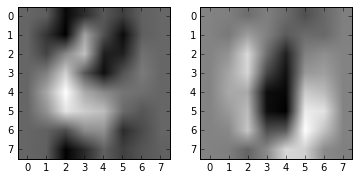

In [8]:
plt.subplot(1,2,1)
plt.imshow(pc1.reshape(8,8),cmap='binary')
plt.subplot(1,2,2)
plt.imshow(pc2.reshape(8,8),cmap='binary');

The first 2 principal components look like a three and an inverted zero. When we transform our dataset from 64 dimensions down to 2 dimensions using PCA, we can see how the 3s are to the right along the first principal component and the 0s are below along the second principal component (since the the second principal component is a zero but with the colors inverted).

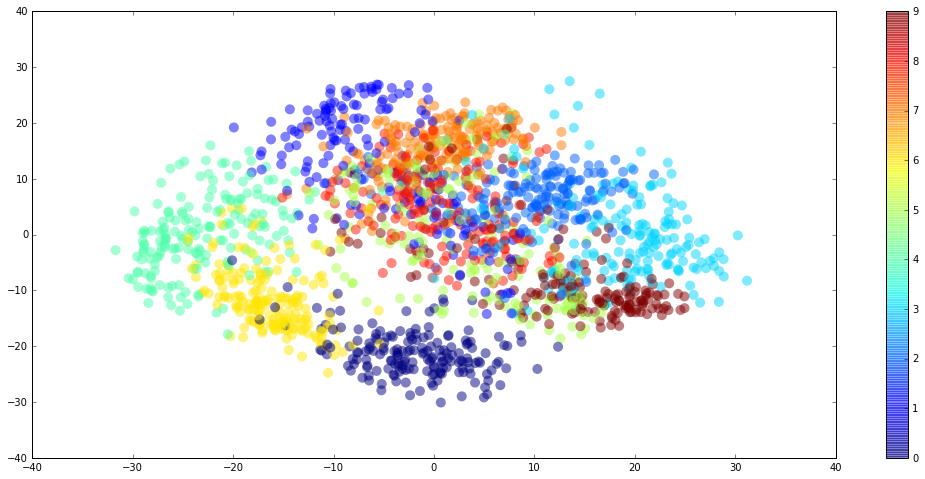

In [9]:
plt.figure(figsize=(18,8))
plt.scatter(digits_2D[:,0],digits_2D[:,1],c=digits.target,s=100,lw=0,alpha=0.5)
plt.colorbar()

Let's write some code that will find the first N principal components and display the images. Notice how the first three principal components look like 3, 0, and 2. But after that it gets a bit unclear.

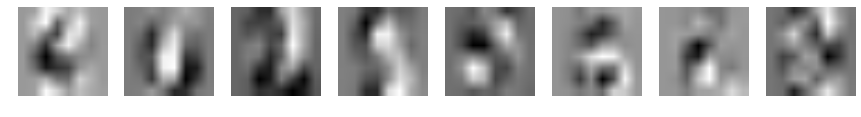

In [10]:
N = 8
pca_ND = PCA(n_components=N)
plt.figure(figsize=(15,10))
pca_ND.fit(digits.data)
pc = pca_ND.components_
plt.subplot(1,N,1)
for n in range(0,N):
    plt.subplot(1,N,n+1)
    plt.imshow(pc[n,:].reshape(8,8),cmap='gray')
    plt.axis('off')

#### Unsupervised Learning

So far we have dealt with supervised learning. For example, the digits dataset is labelled with the correct digit. But what if we ask: how many ways do people write a given digit? This is an unsupervised learning problem since we don't know in advance how many kinds of 1s there are for example. Here we use a clustering algorithm see if there are naturally occuring classes within a dataset.

Let's begin with the number 1.

In [11]:
ones = digits.data[digits.target == 1]

Let's visualize the 1s using PCA.

In [12]:
pca_ones = PCA(n_components=2)
ones_2D = pca_ones.fit_transform(ones)

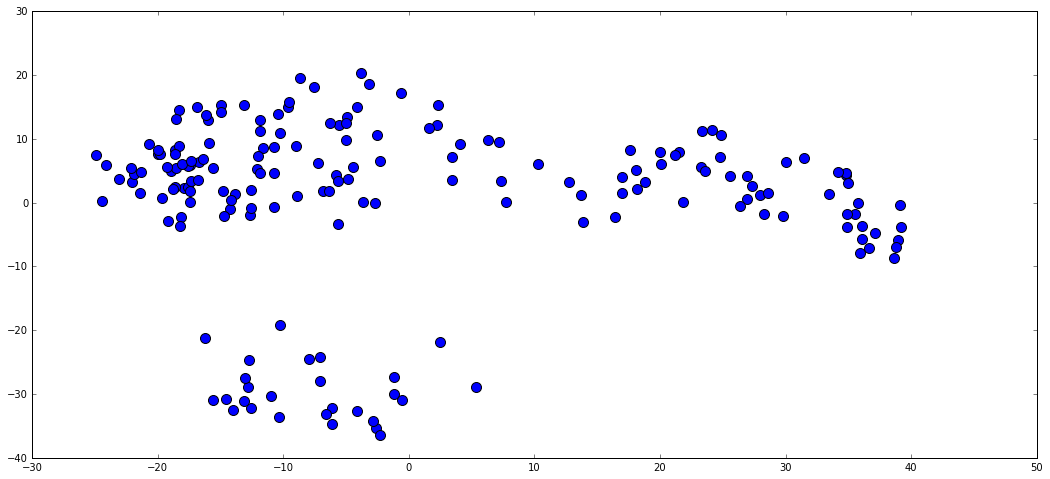

In [13]:
plt.figure(figsize=(18,8))
plt.scatter(ones_2D[:,0],ones_2D[:,1],s=100)

It looks like there are 3 clusters of the digit one. Let's use [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) to find them. This algorithm is quite simple:

1. Choose the number of clusters N.
2. Choose N random points in the dataset, call them the K-means (or cluster centers).
3. Classify all the points in the dataset according to the closest K-means.
4. For each cluster, calculate the average over the cluster and set those as the new K-means.
5. Repeat 3 and 4 until the K-means stabilize (according to a specified tolerance).

In [14]:
from sklearn.cluster import KMeans

In [15]:
N = 3
ones_km = KMeans(n_clusters=N)

In [16]:
ones_km.fit(ones)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

Now that we have computed the K-means, we can access them using the `.cluster_centers_` method.

In [17]:
clusters = ones_km.cluster_centers_

In [18]:
clusters.shape

(3, 64)

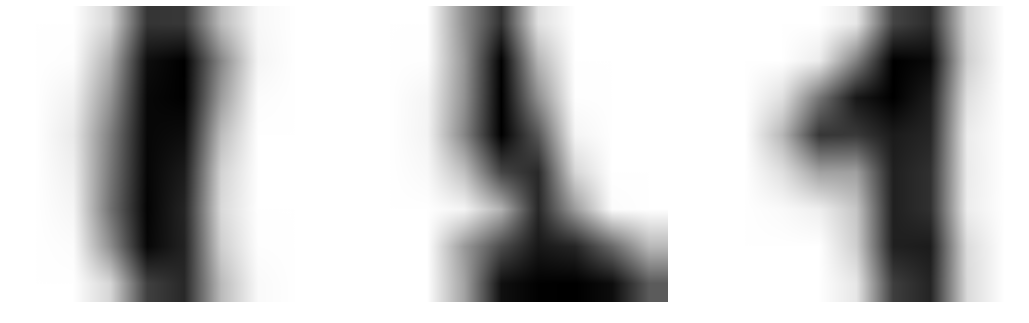

In [19]:
plt.figure(figsize=(18,10))
plt.subplot(1,N,1)
for n in range(0,N):
    plt.subplot(1,N,n+1)
    plt.imshow(clusters[n,:].reshape(8,8),cmap='binary')
    plt.axis('off')

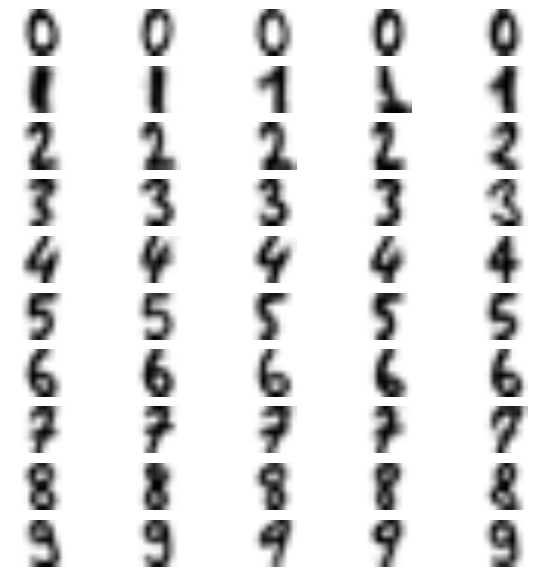

In [20]:
N = 5
plt.figure(figsize=(10,10))
plt.subplot(10,N,1)
for n in range(0,10):
    this_digit = digits.data[digits.target == n]
    km = KMeans(n_clusters = N)
    km.fit(this_digit)
    kinds_of_this_digit = km.cluster_centers_
    for m in range(0,N):
        plt.subplot(10,N,n*N+m+1)
        plt.imshow(kinds_of_this_digit[m,:].reshape(8,8),cmap='binary')
        plt.axis('off')
plt.show()

Strangely, we need to look for 5 or more clusters to see the two distinct kinds of 7s...

Let's combine KMeans with PCA:

1. Collect all the 4s
2. Use KMeans to find 3 clusters
3. Classify all the 4s by these 3 clusters
4. Use PCA to plot the 4s in 2D with colors according to the labels from #3

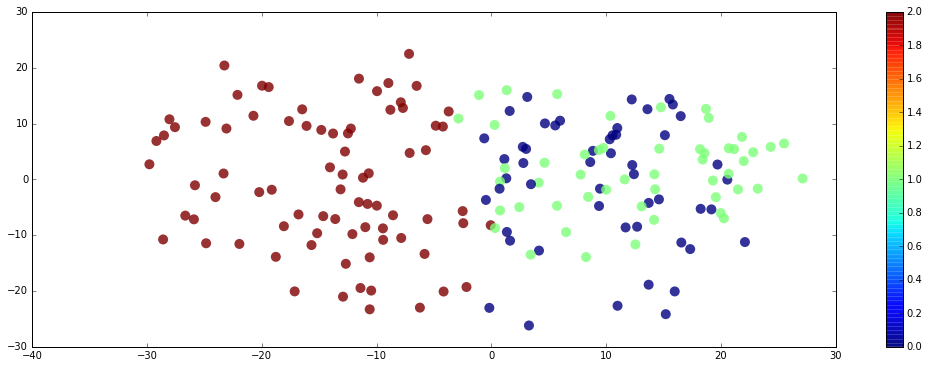

In [21]:
fours = digits.data[digits.target == 4]
km = KMeans(n_clusters=3)
km.fit(fours)
targets = km.predict(fours)
pca = PCA(n_components=2)
fours_2D = pca.fit_transform(fours)
plt.figure(figsize=(18,6))
plt.scatter(fours_2D[:,0],fours_2D[:,1],c=targets,s=100,lw=0,alpha=0.8)
plt.colorbar();

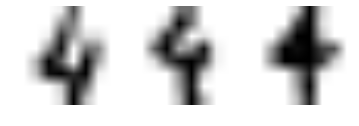

In [22]:
plt.subplot(1,3,1)
plt.imshow(fours[0,:].reshape(8,8),cmap='binary')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(fours[5,:].reshape(8,8),cmap='binary')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(fours[13,:].reshape(8,8),cmap='binary')
plt.axis('off');